In [4]:
from time import time as now
import numpy as np
import smoothing, eval, sys, path_generator
from main import eval_time

In [120]:
# Main computation

kalman_rw = eval_time(smoothing.kalman, path_gen=path_generator.generate_random_walk)
#bezier_rw = eval_time(smoothing.bezier_divided, path_gen=path_generator.generate_random_walk)

kalman_rrt = eval_time(smoothing.kalman, path_gen=path_generator.generate_rrt)
#bezier_rrt = eval_time(smoothing.bezier_divided, path_gen=path_generator.generate_rrt)
#bezier_sp_rrt = eval_time(smoothing.bezier, path_gen=path_generator.generate_rrt)

**************
[1/20] N = 1
[2/20] N = 6
[3/20] N = 11
[4/20] N = 16
[5/20] N = 21
[6/20] N = 26
[7/20] N = 31
[8/20] N = 36
[9/20] N = 41
[10/20] N = 46
[11/20] N = 51
[12/20] N = 56
[13/20] N = 61
[14/20] N = 66
[15/20] N = 71
[16/20] N = 76
[17/20] N = 81
[18/20] N = 86
[19/20] N = 91
[20/20] N = 96
**************
[1/20] N = 1
[2/20] N = 6
[3/20] N = 11
[4/20] N = 16
[5/20] N = 21
[6/20] N = 26
[7/20] N = 31
[8/20] N = 36
[9/20] N = 41
[10/20] N = 46
[11/20] N = 51
[12/20] N = 56
[13/20] N = 61
[14/20] N = 66
[15/20] N = 71
[16/20] N = 76
[17/20] N = 81
[18/20] N = 86
[19/20] N = 91
[20/20] N = 96


Stored 'kalman_rw' (list)
Stored 'bezier_rw' (list)
Stored 'kalman_rrt' (list)
Stored 'bezier_rrt' (list)


In [121]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.spatial.distance import cdist
from main import N_LIST

kf_rw_mean, kf_rw_std, kf_rw_len = kalman_rw
bz_rw_mean, bz_rw_std, bz_rw_len = bezier_rw
kf_rrt_mean, kf_rrt_std, kf_rrt_len = kalman_rrt
bzsp_rrt_mean, bzsp_rrt_std, bzsp_rrt_len = bezier_rrt
bz_rrt_mean, bz_rrt_std, bz_rrt_len = bezier_sp_rrt

Text(0.5, 0, 'Path complexity N (in relative unit)')

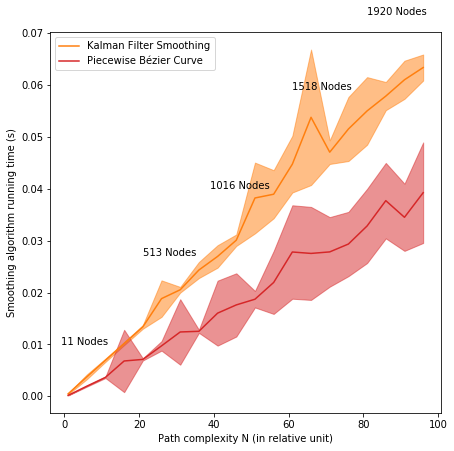

In [122]:
plt.figure(figsize=(7,7))
#plt.subplot(211)

plt.plot(N_LIST, kf_rw_mean, label='Kalman Filter Smoothing', color='#ff7f0e')
plt.fill_between(N_LIST, kf_rw_mean - kf_rw_std, kf_rw_mean + kf_rw_std, alpha=.5, color='#ff7f0e')
plt.plot(N_LIST, bz_rw_mean, label='Piecewise Bézier Curve', color='#d62728')
plt.fill_between(N_LIST, bz_rw_mean - bz_rw_std, bz_rw_mean + bz_rw_std, alpha=.5, color='#d62728')

plt.annotate('%d Nodes' % kf_rw_len[0], xy=(N_LIST[0], kf_rw_mean[0]), xytext=(N_LIST[0]-2, 0.01))
plt.annotate('%d Nodes' % kf_rw_len[5], xy=(N_LIST[5], kf_rw_mean[5]), xytext=(N_LIST[5]-5, 0.027))
plt.annotate('%d Nodes' % kf_rw_len[10], xy=(N_LIST[10], kf_rw_mean[10]), xytext=(N_LIST[10]-12, 0.04))
plt.annotate('%d Nodes' % kf_rw_len[15], xy=(N_LIST[15], kf_rw_mean[15]), xytext=(N_LIST[15]-15, 0.059))
plt.annotate('%d Nodes' % kf_rw_len[19], xy=(N_LIST[19], kf_rw_mean[19]), xytext=(N_LIST[19]-15, 0.0735))

plt.legend(loc='upper left')
plt.ylabel('Smoothing algorithm running time (s)')
plt.xlabel('Path complexity N (in relative unit)')
#plt.title('Random walk smoothing algorithm performances comparison')

#plt.savefig('perf_rw.png')

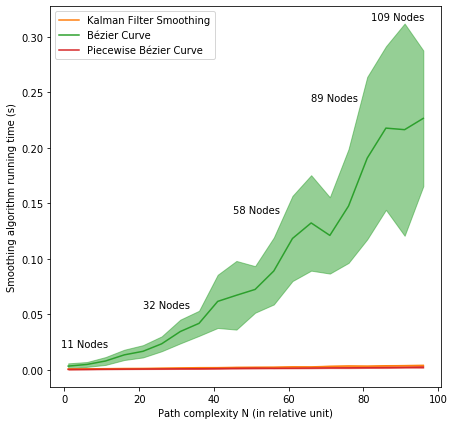

In [111]:
plt.figure(figsize=(7,7))

plt.plot(N_LIST, kf_rrt_mean, label='Kalman Filter Smoothing', color='#ff7f0e')
plt.fill_between(N_LIST, kf_rrt_mean - kf_rrt_std, kf_rrt_mean + kf_rrt_std, alpha=.5, color='#ff7f0e')
plt.plot(N_LIST, bz_rrt_mean, label='Bézier Curve', color='#2ca02c')
plt.fill_between(N_LIST, bz_rrt_mean - bz_rrt_std, bz_rrt_mean + bz_rrt_std, alpha=.5, color='#2ca02c')
plt.plot(N_LIST, bzsp_rrt_mean, label='Piecewise Bézier Curve', color='#d62728')
plt.fill_between(N_LIST, bzsp_rrt_mean - bzsp_rrt_std, bzsp_rrt_mean + bzsp_rrt_std, alpha=.5, color='#d62728')

plt.annotate('%d Nodes' % kf_rrt_len[0], xy=(N_LIST[0], bz_rrt_mean[0]), xytext=(N_LIST[0]-2, bzsp_rrt_mean[0]+0.02))
plt.annotate('%d Nodes' % kf_rrt_len[5], xy=(N_LIST[5], bz_rrt_mean[5]), xytext=(N_LIST[5]-5, bzsp_rrt_mean[5]+0.055))
plt.annotate('%d Nodes' % kf_rrt_len[10], xy=(N_LIST[10], bz_rrt_mean[10]), xytext=(N_LIST[10]-6, bzsp_rrt_mean[10]+0.14))
plt.annotate('%d Nodes' % kf_rrt_len[15], xy=(N_LIST[15], bz_rrt_mean[15]), xytext=(N_LIST[15]-10, bzsp_rrt_mean[15]+0.24))
plt.annotate('%d Nodes' % kf_rrt_len[19], xy=(N_LIST[19], bz_rrt_mean[19]), xytext=(N_LIST[19]-14, bzsp_rrt_mean[19]+0.313))

plt.legend(loc='upper left')
plt.ylabel('Smoothing algorithm running time (s)')
plt.xlabel('Path complexity N (in relative unit)')
#plt.title('RRT* path smoothing algorithm performances comparison')
#plt.savefig('perf_rrt.png')

Text(0.5, 0, 'Path complexity N (in relative unit)')

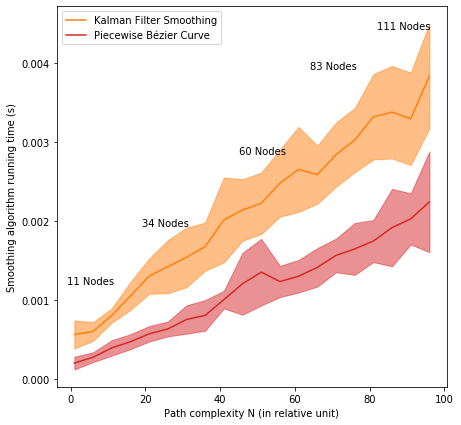

In [123]:
plt.figure(figsize=(7,7))

plt.plot(N_LIST, kf_rrt_mean, label='Kalman Filter Smoothing', color='#ff7f0e')
plt.fill_between(N_LIST, kf_rrt_mean - kf_rrt_std, kf_rrt_mean + kf_rrt_std, alpha=.5, color='#ff7f0e')
#plt.plot(N_LIST, bz_rrt_mean, label='Bézier Curve', color='#2ca02c')
#plt.fill_between(N_LIST, bz_rrt_mean - bz_rrt_std, bz_rrt_mean + bz_rrt_std, alpha=.5, color='#2ca02c')
plt.plot(N_LIST, bzsp_rrt_mean, label='Piecewise Bézier Curve', color='#d62728')
plt.fill_between(N_LIST, bzsp_rrt_mean - bzsp_rrt_std, bzsp_rrt_mean + bzsp_rrt_std, alpha=.5, color='#d62728')

plt.annotate('%d Nodes' % kf_rrt_len[0], xy=(N_LIST[0], bzsp_rrt_mean[0]), xytext=(N_LIST[0]-2, bzsp_rrt_mean[0]+.001))
plt.annotate('%d Nodes' % kf_rrt_len[5], xy=(N_LIST[5], bzsp_rrt_mean[5]), xytext=(N_LIST[5]-7, bzsp_rrt_mean[5]+.0013))
plt.annotate('%d Nodes' % kf_rrt_len[10], xy=(N_LIST[10], bzsp_rrt_mean[10]), xytext=(N_LIST[10]-6, bzsp_rrt_mean[10]+.0015))
plt.annotate('%d Nodes' % kf_rrt_len[15], xy=(N_LIST[15], bzsp_rrt_mean[15]), xytext=(N_LIST[15]-12, bzsp_rrt_mean[15]+.00227))
plt.annotate('%d Nodes' % kf_rrt_len[19], xy=(N_LIST[19], bzsp_rrt_mean[19]), xytext=(N_LIST[19]-14, bzsp_rrt_mean[19]+.00219))

plt.legend(loc='upper left')
plt.ylabel('Smoothing algorithm running time (s)')
plt.xlabel('Path complexity N (in relative unit)')
#plt.title('RRT* path smoothing algorithm performances comparison')
#plt.savefig('perf_rrt2.png')

In [119]:
print(np.max(kf_rrt_mean))
kf_rrt_mean[-1]+kf_rrt_std[-1]

0.003804659843444824


0.004401032081736308